In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from kalman.kalman import KalmanFilter
from kalman.given_kalman import KalmanFilter as GivenFilter

### Test 1: 2D linear motion

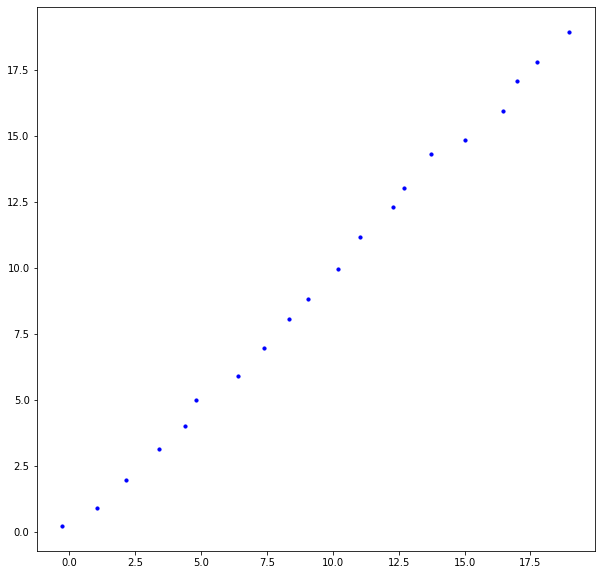

In [32]:
xs = np.arange(20)
ys = np.arange(20)

og_x = xs.copy()
og_y = ys.copy()

np.random.seed(4831)
xs = xs + np.random.randn(len(xs))/4
ys = ys + np.random.randn(len(ys))/8

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', s=10)
plt.show()

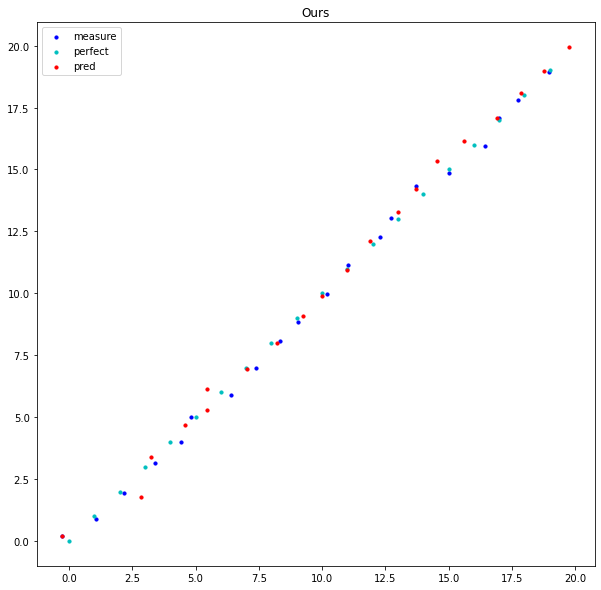

In [33]:
# initialize as we do in run_kalman.py
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

xhs = np.zeros(len(xs))
yhs = np.zeros(len(ys))

for i, (x, y) in enumerate(list(zip(xs, ys))):
#     xh, yh = kf.x[0], kf.x[3]
    xhs[i] = xh
    yhs[i] = yh
    z = np.array([x, y])
    kf.run(z)
    xh, yh = kf.x[0], kf.x[3]
    if i==0:
        plt.scatter(xh, yh, color='r', label='pred', s=10)
    else:
        plt.scatter(xh, yh, color='r', s=10)
        
# kf.predict()
        
plt.title('Ours')
plt.legend()
plt.show()

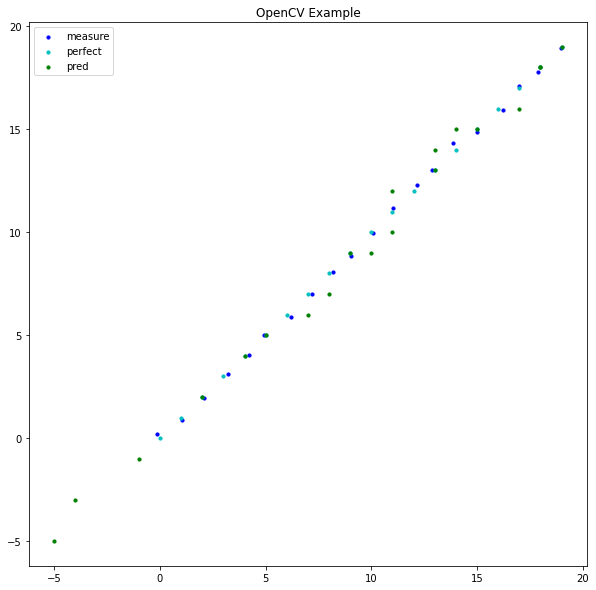

In [20]:
kf2 = GivenFilter()

xh2s = np.zeros(len(xs))
yh2s = np.zeros(len(ys))

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

for i, (x, y) in enumerate(list(zip(xs, ys))):
    xh2, yh2 = kf2.predict([x, y])
    xh2s[i] = xh2
    yh2s[i] = yh2
    if i==0:
        plt.scatter(xh2, yh2, color='g', label='pred', s=10)
    else:
        plt.scatter(xh2, yh2, color='g', s=10)
plt.legend()
plt.title('OpenCV Example')
plt.show()

In [21]:
print(f'Error in measurement: {np.linalg.norm(og_x-xs)}')
print(f'Error in ours: {np.linalg.norm(og_x-xhs)}')
print(f'Error in theirs: {np.linalg.norm(og_x-xh2s)}')

Error in measurement: 0.6025809406324095
Error in ours: 1.441351822684105
Error in theirs: 8.366600265340756


### Test 2: Simulated Parabola

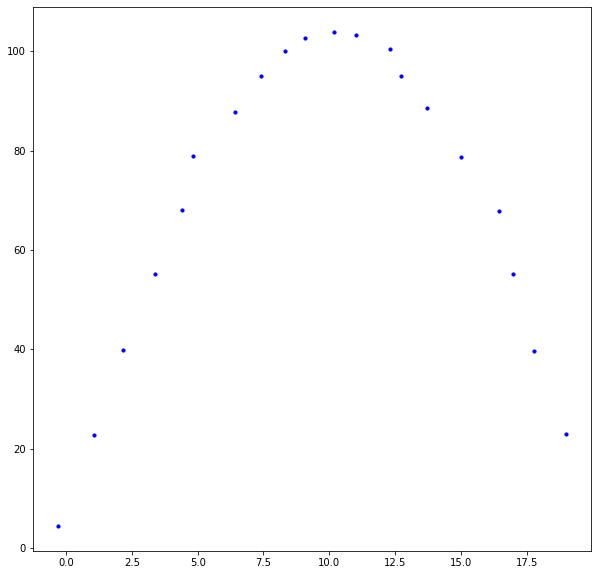

In [26]:
def parab(x, a, b, c):
    return a*x**2 + b*x + c

xs = np.arange(20)
ys = np.array([parab(x, -1, 20, 4) for x in xs])

og_x = xs.copy()
og_y = ys.copy()

np.random.seed(4831)
xs = xs + np.random.randn(len(xs))/4
ys = ys + np.random.randn(len(ys))/4

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', s=10)
plt.show()

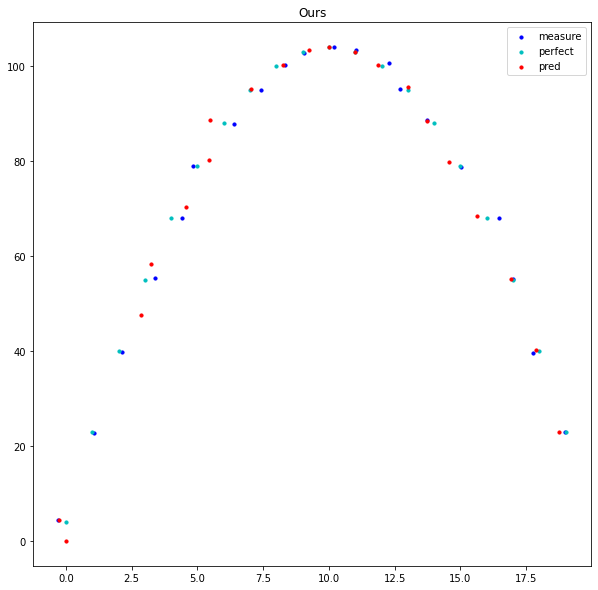

In [27]:
# initialize as we do in run_kalman.py
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

xhs = np.zeros(len(xs))
yhs = np.zeros(len(ys))

for i, (x, y) in enumerate(list(zip(xs, ys))):
    xh, yh = kf.x[0], kf.x[3]
    xhs[i] = xh
    yhs[i] = yh
    z = np.array([x, y])
    kf.run(z)
    if i==0:
        plt.scatter(xh, yh, color='r', label='pred', s=10)
    else:
        plt.scatter(xh, yh, color='r', s=10)
        
plt.title('Ours')
plt.legend()
plt.show()

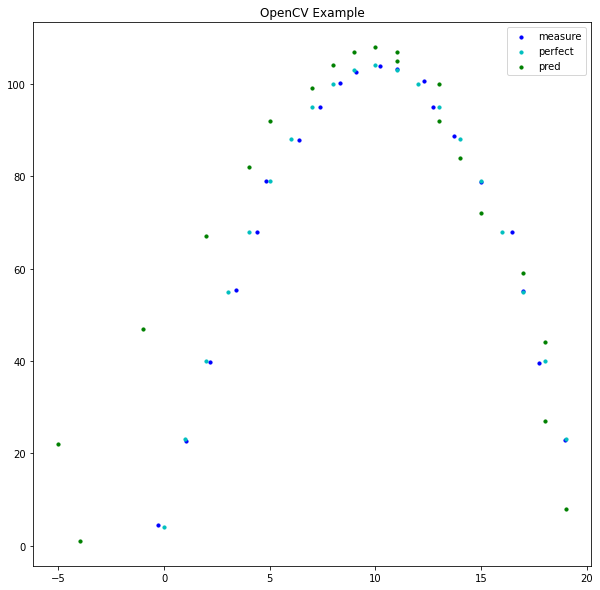

In [28]:
kf2 = GivenFilter()

xh2s = np.zeros(len(xs))
yh2s = np.zeros(len(ys))

plt.figure(figsize=(10,10))

plt.scatter(xs, ys, color='b', label='measure', s=10)
plt.scatter(og_x, og_y, color='c', label='perfect', s=10)

for i, (x, y) in enumerate(list(zip(xs, ys))):
    xh2, yh2 = kf2.predict([x, y])
    xh2s[i] = xh2
    yh2s[i] = yh2
    if i==0:
        plt.scatter(xh2, yh2, color='g', label='pred', s=10)
    else:
        plt.scatter(xh2, yh2, color='g', s=10)
plt.legend()
plt.title('OpenCV Example')
plt.show()

In [29]:
print(f'Error in measurement: {np.linalg.norm(og_x-xs)}')
print(f'Error in ours: {np.linalg.norm(og_x-xhs)}')
print(f'Error in theirs: {np.linalg.norm(og_x-xh2s)}')

Error in measurement: 1.2051618812648208
Error in ours: 1.970840195197043
Error in theirs: 8.366600265340756
